## Problem 1

In [1]:
using Images
using Plots; pyplot()
using LinearAlgebra

In [2]:
img_path = "harvey-saturday-goes7am.jpg"
img = load(img_path)
size(img)

(1296, 1548)

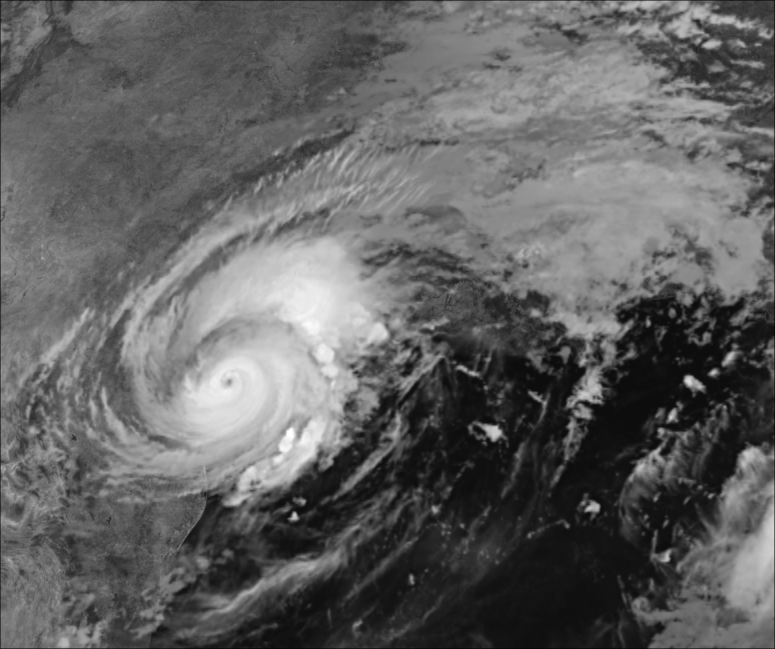

In [3]:
X = Gray.(img)

In [4]:
X = Float64.(X);

In [5]:
function svd_compress(X, k)
    
    U, σ, V = svd(X, full=true); # slow to redo SVD, but not a big deal for homework
    X̃       = sum(σ[i] * U[:, i] * V[:, i]' for i in 1:k)
    err     = norm(X - X̃)/norm(X)
    
    return X̃, err
    
end

svd_compress (generic function with 1 method)

### Problem 1a  |  $k = 2$

0.2815103158754801

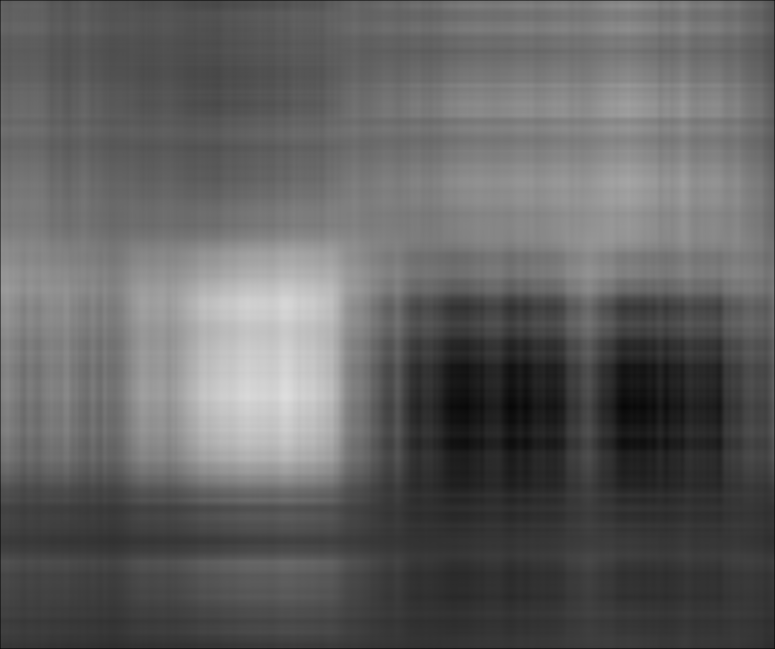

In [6]:
X̃, err = svd_compress(X, 2)
print(err)
#save("svd_k2.png", Gray.(X̃))
Gray.(X̃)

### Problem 1a  |  $k = 10$

0.15876586555633745

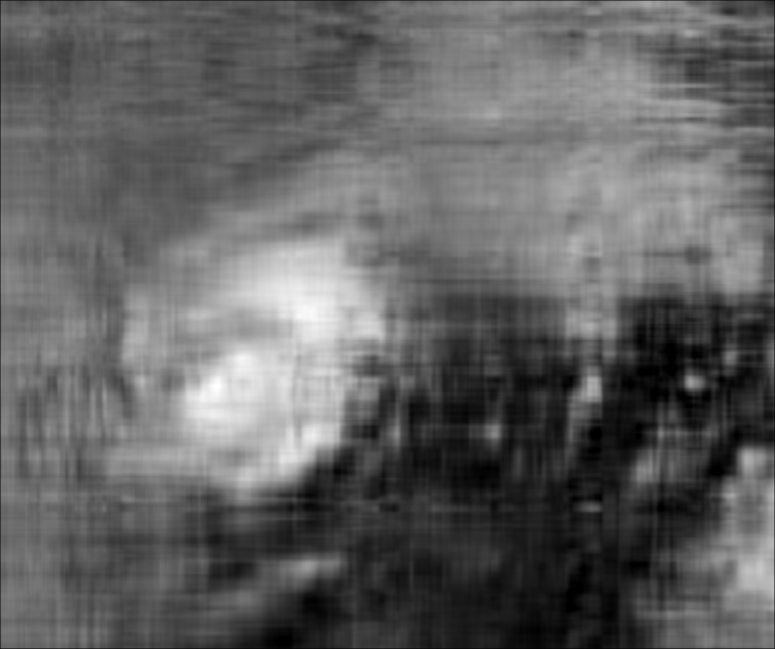

In [7]:
X̃, err = svd_compress(X, 10)
print(err)
#save("svd_k10.png", Gray.(X̃))
Gray.(X̃)

### Problem 1a | $k = 40$

0.08368458635729387

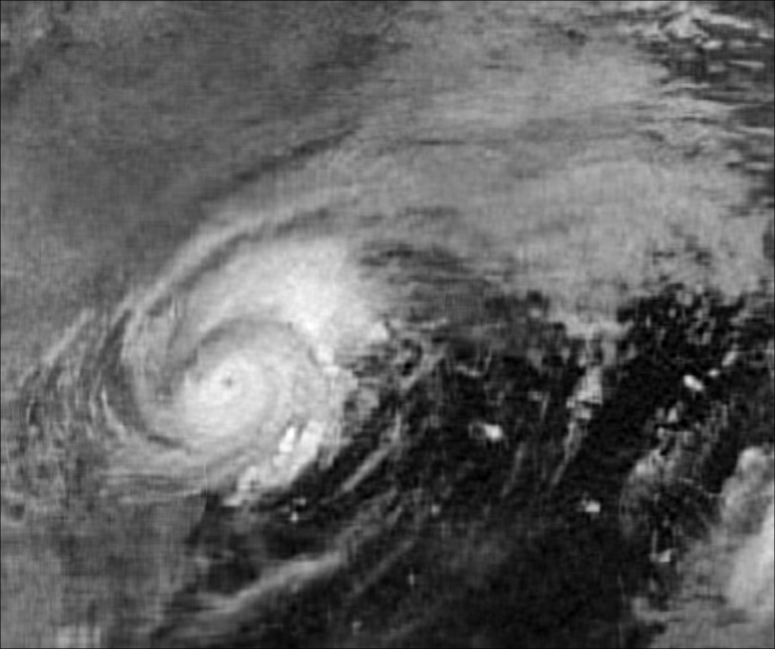

In [8]:
X̃, err = svd_compress(X, 40)
print(err)
#save("svd_k40.png", Gray.(X̃))
Gray.(X̃)

## Problem 4

In [9]:
using MAT
using Statistics

In [10]:
vars = matread("mnist_all.mat");

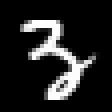

In [11]:
test_3_9 = vars["test3"][9,:]
img_as_mat(example) = permutedims(reshape(example, (28, 28)), [2, 1])
Gray.(img_as_mat(test_3_9)/255)

In [12]:
function get_dataset(vars, classifier_digit)

    X_train = zeros()
    y_train = zeros()

    X_test  = zeros()
    y_test  = zeros()

    for digit in 0:9

        label = digit == classifier_digit ? 1 : 0

        X_train = digit == 0 ? vars["train$(digit)"] : vcat(X_train, vars["train$(digit)"])
        y_train = digit == 0 ? label*ones(size(vars["train$(digit)"])[1], 1) : vcat(y_train, label*ones(size(vars["train$(digit)"])[1], 1))

        X_test  = digit == 0 ? vars["test$(digit)"]  : vcat(X_test,  vars["test$(digit)"])
        y_test  = digit == 0 ? label*ones(size(vars["test$(digit)"])[1], 1)  : vcat(y_test,  label*ones(size(vars["test$(digit)"])[1], 1))

    end

    X_train = Float64.(X_train)
    y_train = Float64.(y_train)

    X_test  = Float64.(X_test)
    y_test  = Float64.(y_test);
    
    return X_train, y_train, X_test, y_test
    
end

get_dataset (generic function with 1 method)

In [13]:
binarize(vec, threshold) = [v >= threshold ? 1 : 0 for v in vec]
zero_one_loss(ŷ, y) = sum(  ŷ .≠  y)
accuracy(     ŷ, y) = mean( ŷ .== y)
squared_loss( ŷ, y) = mean((ŷ .-  y).^2)

squared_loss (generic function with 1 method)

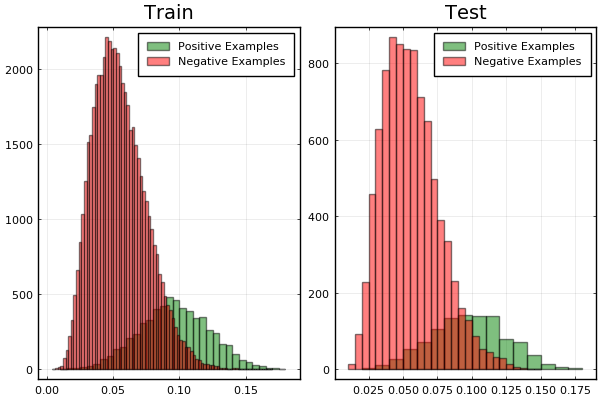

In [14]:
digit = 2

X_train, y_train, X_test, y_test = get_dataset(vars, digit)

λ = 1E11

w = inv(X_train'*X_train + λ*I)*X_train'*y_train

ŷ_train = X_train * w
ŷ_test  = X_test  * w

p1 = histogram( ŷ_train[y_train .== 1], alpha=0.5, title="Train", label="Positive Examples", c=:green, box=:on)
     histogram!(ŷ_train[y_train .== 0], alpha=0.5, label="Negative Examples", c=:red)

p2 = histogram( ŷ_test[ y_test  .== 1], alpha=0.5, title="Test", label="Positive Examples", c=:green, box=:on)
     histogram!(ŷ_test[ y_test  .== 0], alpha=0.5, label="Negative Examples", c=:red)

plot(p1, p2)

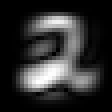

In [15]:
w = abs.(w)
w = (w .- minimum(w)) / (maximum(w) - minimum(w))
attention_map = Gray.(permutedims(reshape(w, (28, 28)), [2, 1]))

In [16]:
threshold = 0.1

ŷ_train_b = binarize(ŷ_train, threshold)
ŷ_test_b  = binarize(ŷ_test,  threshold)

@show train_zero_one_loss = zero_one_loss(ŷ_train_b, y_train)
@show train_squared_loss  = squared_loss( ŷ_train_b, y_train)
@show train_accuracy      = accuracy(     ŷ_train_b, y_train)

@show test_zero_one_loss  = zero_one_loss(ŷ_test_b,  y_test)
@show test_squared_loss   = squared_loss( ŷ_test_b,  y_test)
@show test_accuracy       = accuracy(     ŷ_test_b,  y_test);

train_zero_one_loss = zero_one_loss(ŷ_train_b, y_train) = 4637
train_squared_loss = squared_loss(ŷ_train_b, y_train) = 0.07728333333333333
train_accuracy = accuracy(ŷ_train_b, y_train) = 0.9227166666666666
test_zero_one_loss = zero_one_loss(ŷ_test_b, y_test) = 819
test_squared_loss = squared_loss(ŷ_test_b, y_test) = 0.0819
test_accuracy = accuracy(ŷ_test_b, y_test) = 0.9181


## Problem 6

In [17]:
using Distributions

In [18]:
function rand_matrix_from_row_dist(dist, n, d)
    
    A = zeros(n, d)
    
    for i in 1:n
        A[i, :] = rand(dist)
    end
    
    return A
    
end

rand_matrix_from_row_dist (generic function with 1 method)

In [19]:
n = 500
d = 50

μ = ones(d)
Σ = [2*0.5^abs(i-j) for i in 1:d, j in 1:d]

μt = zeros(d)

GA = MvNormal(μ, Σ)
T1 = MvTDist(1, μt, Σ)
T3 = MvTDist(3, μt, Σ)

A_GA = rand_matrix_from_row_dist(GA, n, d)
A_T3 = rand_matrix_from_row_dist(T3, n, d)
A_T1 = rand_matrix_from_row_dist(T1, n, d)

x_star = randn(d)

b_GA = A_GA * x_star + 0.01*rand(n)
b_T3 = A_T3 * x_star + 0.01*rand(n)
b_T1 = A_T1 * x_star + 0.01*rand(n);

### Problem 6(a)

In [20]:
function uniform_distribution(A)
    
    n    = size(A)[1]
    dist = DiscreteNonParametric([i for i in 1:n], [1/n for i in 1:n])
    
end

function row_score_distribution(A)
    
    row_scores = [norm(row, 2)^2 for row in eachrow(A)]
    probs      = normalize(row_scores, 1)
    
    dist = DiscreteNonParametric([i for i in 1:size(A)[1]], probs)
    
end

row_score_distribution (generic function with 1 method)

In [21]:
unif_dist_GA = uniform_distribution(A_GA)
unif_dist_T3 = uniform_distribution(A_T3)
unif_dist_T1 = uniform_distribution(A_T1)

rs_dist_GA   = row_score_distribution(A_GA)
rs_dist_T3   = row_score_distribution(A_T3)
rs_dist_T1   = row_score_distribution(A_T1);

In [22]:
using ProgressMeter

In [23]:
function random_sampling_approximate_least_squares(A, b, dist, r_max)

    d = size(A)[2]
    x = inv(A'*A)*A'*b
    errors = []
    
    Ã = zeros(1, d)
    b̃ = zeros(1, 1)
    
    @showprogress for k in 1:r_max

        ik = rand(dist)

        if k == 1
            Ã[k, :] = A[ik, :]
            b̃[k]    = b[ik]
        else
            Ã = vcat(Ã, reshape(A[ik, :], (1, d)))
            b̃ = vcat(b̃, b[ik])
        end
        
        if k ≥ d
            x̃ = inv(Ã'*Ã)*Ã'*b̃
            push!(errors, norm(x̃ .- x, 2) / norm(x, 2))
        end
        
    end
    
    return errors
    
end

random_sampling_approximate_least_squares (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


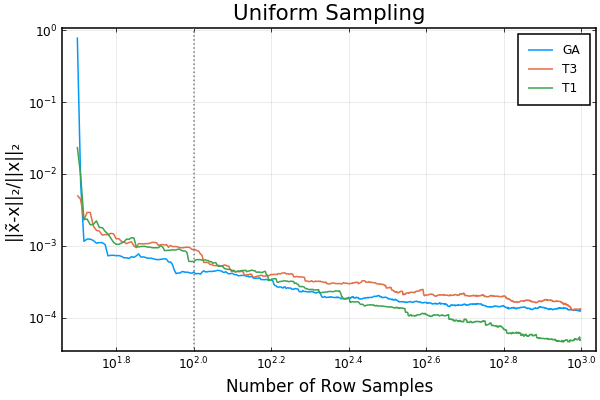

In [24]:
r_max = 20d

unif_errs_GA = random_sampling_approximate_least_squares(A_GA, b_GA, unif_dist_GA, r_max)
unif_errs_T3 = random_sampling_approximate_least_squares(A_T3, b_T3, unif_dist_T3, r_max)
unif_errs_T1 = random_sampling_approximate_least_squares(A_T1, b_T1, unif_dist_T1, r_max)

plot( d:r_max, unif_errs_GA, label="GA", xscale=:log10, yscale=:log10, box=:on, thickness_scaling=1.1, 
        title="Uniform Sampling", xlabel="Number of Row Samples", ylabel="||x̃-x||₂/||x||₂")
plot!(d:r_max, unif_errs_T3, label="T3")
plot!(d:r_max, unif_errs_T1, label="T1")
vline!([2d], c=:gray, ls=:dot, label=:none)

#png("als_error_unif_sampling.png")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


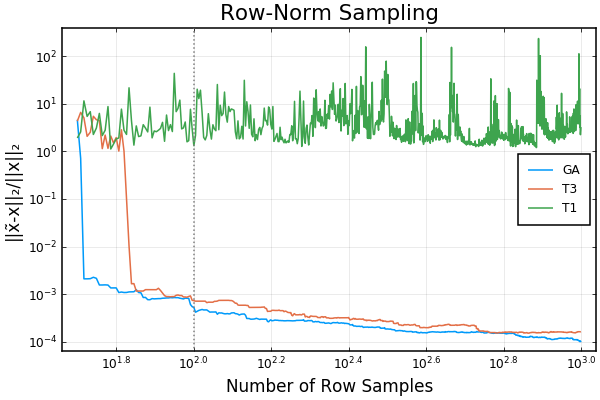

In [25]:
r_max = 20d

rs_errs_GA = random_sampling_approximate_least_squares(A_GA, b_GA, rs_dist_GA, r_max)
rs_errs_T3 = random_sampling_approximate_least_squares(A_T3, b_T3, rs_dist_T3, r_max)
rs_errs_T1 = random_sampling_approximate_least_squares(A_T1, b_T1, rs_dist_T1, r_max)

plot( d:r_max, rs_errs_GA, label="GA", xscale=:log10, yscale=:log10, box=:on, thickness_scaling=1.1, 
        title="Row-Norm Sampling", xlabel="Number of Row Samples", ylabel="||x̃-x||₂/||x||₂")
plot!(d:r_max, rs_errs_T3, label="T3")
plot!(d:r_max, rs_errs_T1, label="T1")
vline!([2d], c=:gray, ls=:dot, label=:none)

#png("als_error_rs_sampling.png")

### Problem 6(b)

In [26]:
function rademacher_random_projection_matrix(m, d)
    
    s = [rand() >= 0.5 ? 1 : -1 for _ in 1:m*d]
    S =  reshape(s, (m, d))
    
    return S
    
end

function gaussian_random_projection_matrix(m, d)
    
    s = [randn() for _ in 1:m*d]
    S = 1/sqrt(m)*reshape(s, (m, d))
    
    return S
    
end

gaussian_random_projection_matrix (generic function with 1 method)

In [27]:
function random_projection_approximate_least_squares(A, b, projection_method, m_max)
    
    d = size(A)[2]
    x = inv(A'*A)*A'*b
    errors = []
    
    @showprogress for m in d:m_max

        S = projection_method(m, n)
        
        SA = S*A
        Sb = S*b
        
        x̃ = inv(SA'*SA)*SA'*Sb
        push!(errors, norm(x̃ .- x, 2) / norm(x, 2))
        
    end
    
    return errors
    
end

random_projection_approximate_least_squares (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


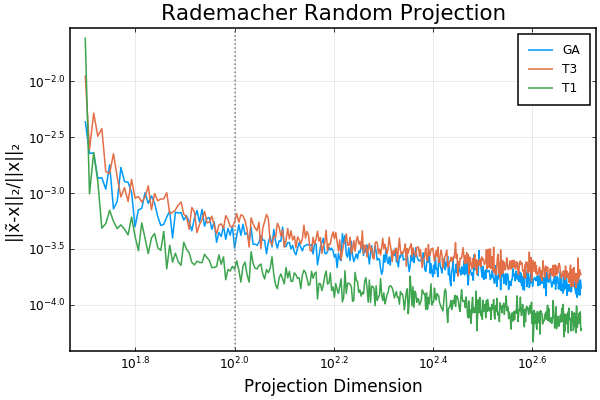

In [28]:
m_max = 10d

rade_errs_GA = random_projection_approximate_least_squares(A_GA, b_GA, rademacher_random_projection_matrix, m_max)
rade_errs_T3 = random_projection_approximate_least_squares(A_T3, b_T3, rademacher_random_projection_matrix, m_max)
rade_errs_T1 = random_projection_approximate_least_squares(A_T1, b_T1, rademacher_random_projection_matrix, m_max)

plot( d:m_max, rade_errs_GA, label="GA", xscale=:log10, yscale=:log10, box=:on, thickness_scaling=1.1, 
        title="Rademacher Random Projection", xlabel="Projection Dimension", ylabel="||x̃-x||₂/||x||₂")
plot!(d:m_max, rade_errs_T3, label="T3")
plot!(d:m_max, rade_errs_T1, label="T1")
vline!([2d], c=:gray, ls=:dot, label=:none)

#png("als_error_rade_projection.png")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


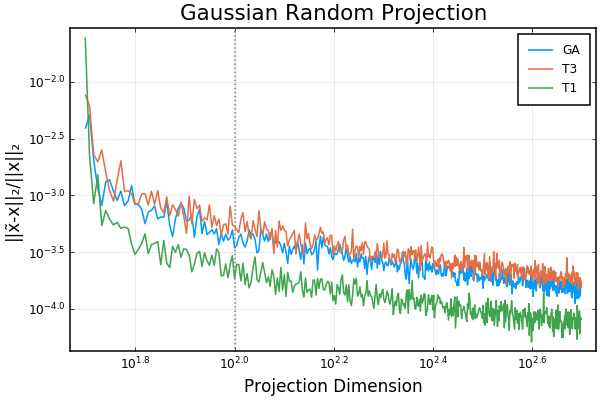

In [29]:
m_max = 10d

gaussian_errs_GA = random_projection_approximate_least_squares(A_GA, b_GA, gaussian_random_projection_matrix, m_max)
gaussian_errs_T3 = random_projection_approximate_least_squares(A_T3, b_T3, gaussian_random_projection_matrix, m_max)
gaussian_errs_T1 = random_projection_approximate_least_squares(A_T1, b_T1, gaussian_random_projection_matrix, m_max)

plot( d:m_max, gaussian_errs_GA, label="GA", xscale=:log10, yscale=:log10, box=:on, thickness_scaling=1.1, 
        title="Gaussian Random Projection", xlabel="Projection Dimension", ylabel="||x̃-x||₂/||x||₂")
plot!(d:m_max, gaussian_errs_T3, label="T3")
plot!(d:m_max, gaussian_errs_T1, label="T1")
vline!([2d], c=:gray, ls=:dot, label=:none)

#png("als_error_gaussian_projection.png")

### Problem 6(c)

In [30]:
function sparse_gaussian_random_projection_matrix(m, d, q=0.5)
    
    s = [rand() <= q ? 0 : (1-q)*randn() for _ in 1:m*d]
    S = 1/sqrt(m)*reshape(s, (m, d))
    
    return S
    
end

sparse_gaussian_random_projection_matrix (generic function with 2 methods)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16
Progress: 100%|█████████████████████████████████████████| Time: 0:00:14
Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


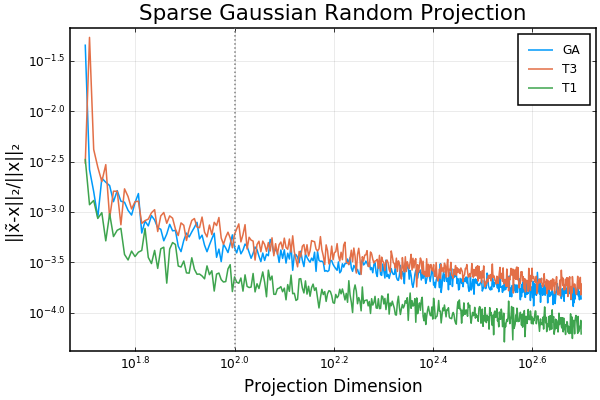

In [31]:
m_max = 10d

sparse_gaussian_errs_GA = random_projection_approximate_least_squares(A_GA, b_GA, sparse_gaussian_random_projection_matrix, m_max)
sparse_gaussian_errs_T3 = random_projection_approximate_least_squares(A_T3, b_T3, sparse_gaussian_random_projection_matrix, m_max)
sparse_gaussian_errs_T1 = random_projection_approximate_least_squares(A_T1, b_T1, sparse_gaussian_random_projection_matrix, m_max)

plot( d:m_max, sparse_gaussian_errs_GA, label="GA", xscale=:log10, yscale=:log10, box=:on, thickness_scaling=1.1, 
        title="Sparse Gaussian Random Projection", xlabel="Projection Dimension", ylabel="||x̃-x||₂/||x||₂")
plot!(d:m_max, sparse_gaussian_errs_T3, label="T3")
plot!(d:m_max, sparse_gaussian_errs_T1, label="T1")
vline!([2d], c=:gray, ls=:dot, label=:none)

#png("als_error_sparse_gaussian_projection.png")

In [32]:
function random_projection_approximate_least_squares_vary_q(A, b, projection_method, m)
    
    d = size(A)[2]
    x = inv(A'*A)*A'*b
    qvals = []
    errors = []
    
    @showprogress for q in 0.01:0.01:0.99

        S = projection_method(m, n, q)
        
        SA = S*A
        Sb = S*b
        
        try 
            x̃ = inv(SA'*SA)*SA'*Sb
            push!(qvals, q)
            push!(errors, norm(x̃ .- x, 2) / norm(x, 2))
        catch
        end
        
    end
    
    return qvals, errors
    
end

random_projection_approximate_least_squares_vary_q (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


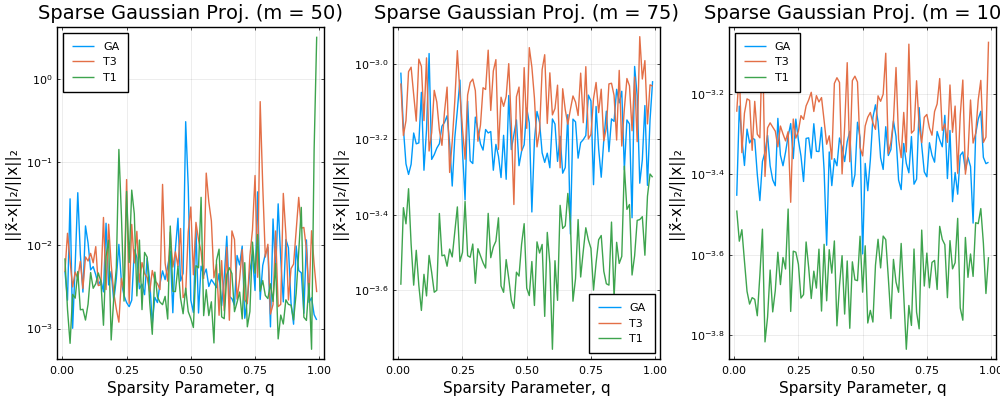

In [33]:
m = d

q_GA, sparse_gaussian_errs_q_GA = random_projection_approximate_least_squares_vary_q(A_GA, b_GA, sparse_gaussian_random_projection_matrix, m)
q_T3, sparse_gaussian_errs_q_T3 = random_projection_approximate_least_squares_vary_q(A_T3, b_T3, sparse_gaussian_random_projection_matrix, m)
q_T1, sparse_gaussian_errs_q_T1 = random_projection_approximate_least_squares_vary_q(A_T1, b_T1, sparse_gaussian_random_projection_matrix, m)

p1 = plot(q_GA, sparse_gaussian_errs_q_GA, label="GA", yscale=:log10, box=:on, 
        title="Sparse Gaussian Proj. (m = $m)", xlabel="Sparsity Parameter, q", ylabel="||x̃-x||₂/||x||₂")
plot!(q_T3, sparse_gaussian_errs_q_T3, label="T3")
plot!(q_T1, sparse_gaussian_errs_q_T1, label="T1")

m = Int(round(1.5d))

q_GA, sparse_gaussian_errs_q_GA = random_projection_approximate_least_squares_vary_q(A_GA, b_GA, sparse_gaussian_random_projection_matrix, m)
q_T3, sparse_gaussian_errs_q_T3 = random_projection_approximate_least_squares_vary_q(A_T3, b_T3, sparse_gaussian_random_projection_matrix, m)
q_T1, sparse_gaussian_errs_q_T1 = random_projection_approximate_least_squares_vary_q(A_T1, b_T1, sparse_gaussian_random_projection_matrix, m)

p2 = plot(q_GA, sparse_gaussian_errs_q_GA, label="GA", yscale=:log10, box=:on, 
        title="Sparse Gaussian Proj. (m = $m)", xlabel="Sparsity Parameter, q", ylabel="||x̃-x||₂/||x||₂")
plot!(q_T3, sparse_gaussian_errs_q_T3, label="T3")
plot!(q_T1, sparse_gaussian_errs_q_T1, label="T1")

m = 2d

q_GA, sparse_gaussian_errs_q_GA = random_projection_approximate_least_squares_vary_q(A_GA, b_GA, sparse_gaussian_random_projection_matrix, m)
q_T3, sparse_gaussian_errs_q_T3 = random_projection_approximate_least_squares_vary_q(A_T3, b_T3, sparse_gaussian_random_projection_matrix, m)
q_T1, sparse_gaussian_errs_q_T1 = random_projection_approximate_least_squares_vary_q(A_T1, b_T1, sparse_gaussian_random_projection_matrix, m)

p3 = plot(q_GA, sparse_gaussian_errs_q_GA, label="GA", yscale=:log10, box=:on, 
        title="Sparse Gaussian Proj. (m = $m)", xlabel="Sparsity Parameter, q", ylabel="||x̃-x||₂/||x||₂")
plot!(q_T3, sparse_gaussian_errs_q_T3, label="T3")
plot!(q_T1, sparse_gaussian_errs_q_T1, label="T1")

plot(p1, p2, p3, layout=(1,3), size=(1000, 400))
#png("als_error_sparse_gaussian_projection.png")